In [1]:
#import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#import dataset
wine_df = pd.read_csv("./datasets/winequality-red.csv", sep=";")

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#preprocessing
bins = (2, 6.5, 8)
group_names = ["bad", "good"]
# wine_df["quality_old"] = wine_df["quality"]
wine_df["quality"] = pd.cut(wine_df["quality"], bins=bins, labels=group_names)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [7]:
wine_df["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [8]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [9]:
#Encode one-hot
label_quality=LabelEncoder()
# wine_df["quality_original"] = wine_df["quality"]
wine_df["quality"]=label_quality.fit_transform(wine_df["quality"])

In [10]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [11]:
wine_df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

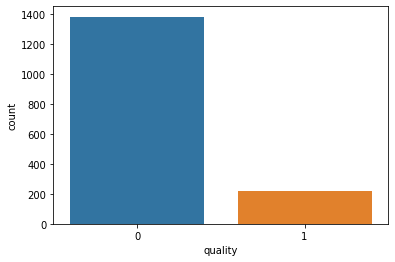

In [12]:
#Plot bar graph of count of each category
sns.countplot(wine_df["quality"])

In [13]:
#Split the dataset
X=wine_df.drop("quality", axis=1)
y=wine_df["quality"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1259,6.8,0.640,0.00,2.70,0.123,15.0,33.0,0.99538,3.44,0.63,11.3
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1155,8.3,0.600,0.25,2.20,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
963,8.8,0.270,0.39,2.00,0.100,20.0,27.0,0.99546,3.15,0.69,11.2


In [15]:
#Scale the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [16]:
X_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

# Random Forest Classifier

In [17]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)

In [18]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [19]:
#Model Performance
print(classification_report(y_test, pred_rfc))
print()
print(confusion_matrix(y_test, pred_rfc))
print()
print(accuracy_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320


[[266   7]
 [ 29  18]]

0.8875


# SVM Classifier

In [20]:
clf= svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)

In [21]:
pred_clf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
print(classification_report(y_test, pred_clf))
print()
print(confusion_matrix(y_test, pred_clf))
print()
print(accuracy_score(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320


[[268   5]
 [ 35  12]]

0.875


# Neural Network

In [23]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
print(classification_report(y_test, pred_mlpc))
print()
print(confusion_matrix(y_test, pred_mlpc))
print()
print(accuracy_score(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       273
           1       0.56      0.40      0.47        47

    accuracy                           0.87       320
   macro avg       0.73      0.67      0.70       320
weighted avg       0.85      0.87      0.86       320


[[258  15]
 [ 28  19]]

0.865625


In [25]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [26]:
X_new=[[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
X_new=scaler.fit_transform(X_new)
y_new=rfc.predict(X_new)
y_new

array([0])